<a href="https://colab.research.google.com/github/davidandw190/pytorch-deep-learning-workspace/blob/main/notebooks-for-learning/02_pytorch_dl_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Neural Network Classification

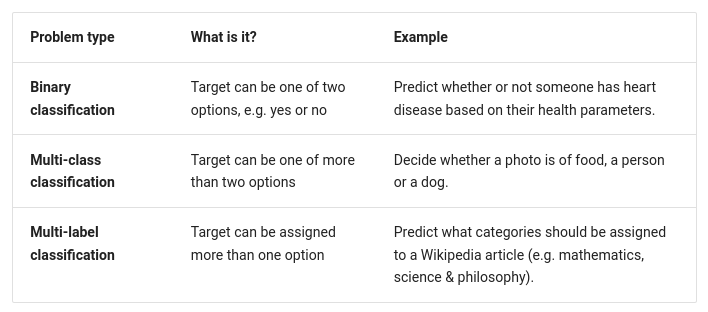


## 1. Preparing some toy classification data

For now, we'll use the `make_circles()` method from Scikit-Learn to generate two circles with different coloured dots.

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

In [ ]:
import pandas as pd

# Make DataFrame of circle data
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

In [ ]:
# Check different labels
circles.label.value_counts()

Lets now plot it all

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

Lets find out how we could build a PyTorch neural network to classify dots into red (0) or blue (1).

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

In [ ]:
X

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")


This tells us the second dimension for X means it has two features (vector) where as y has a single feature (scalar).

We have two inputs for one output.

In [10]:
import torch

torch.__version__

'2.4.0+cu121'

In [11]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [12]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [13]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [14]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [15]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [16]:
n_samples

1000

### 2. Building a classification model

In [17]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [18]:
X_train, X_train.shape

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         ...,
         [ 0.0157, -1.0300],
         [ 1.0110,  0.1680],
         [ 0.5578, -0.5709]]),
 torch.Size([800, 2]))

In [19]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [20]:
from torch import nn

class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=16)
    self.layer_2 = nn.Linear(in_features=16, out_features=16)
    self.layer_3 = nn.Linear(in_features=16, out_features=8)
    self.layer_4 = nn.Linear(in_features=8, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function

  def forward(self, x):
    return self.layer_4(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x))))))

model_0 = CircleModel().to(device)
model_0

CircleModel(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=8, bias=True)
  (layer_4): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

In [21]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [22]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.1)

In [23]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.3272, -0.4010],
                      [-0.7015, -0.6047],
                      [-0.1826,  0.3005],
                      [ 0.6294,  0.0040],
                      [ 0.5203,  0.2958],
                      [ 0.0465,  0.4454],
                      [-0.6712,  0.4566],
                      [ 0.0274, -0.4199],
                      [ 0.6327, -0.5202],
                      [ 0.0409, -0.0109],
                      [ 0.3472, -0.1443],
                      [-0.2455,  0.3369],
                      [ 0.0598,  0.5788],
                      [-0.5423, -0.0651],
                      [ 0.4553,  0.0359],
                      [ 0.5179,  0.5188]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.2037, -0.4134,  0.3505,  0.6137, -0.5311,  0.5413,  0.4001,  0.2964,
                       0.1554,  0.0102,  0.3664, -0.6411,  0.3461,  0.4493, -0.5791, -0.1024],
                     device='cuda:0')),
             ('la

In [24]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [25]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

## 3. Training a model with non-linearity

In [26]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [27]:
# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [28]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [29]:
epochs = 1500

for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes in logits as first input)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.6956, Acc: 50.00% | Test Loss: 0.6961, Test Acc: 50.00%
Epoch: 100 | Loss: 0.6934, Acc: 49.62% | Test Loss: 0.6941, Test Acc: 45.00%
Epoch: 200 | Loss: 0.6927, Acc: 50.62% | Test Loss: 0.6936, Test Acc: 47.00%
Epoch: 300 | Loss: 0.6918, Acc: 52.00% | Test Loss: 0.6931, Test Acc: 51.00%
Epoch: 400 | Loss: 0.6906, Acc: 53.25% | Test Loss: 0.6924, Test Acc: 50.50%
Epoch: 500 | Loss: 0.6887, Acc: 54.00% | Test Loss: 0.6913, Test Acc: 50.50%
Epoch: 600 | Loss: 0.6855, Acc: 54.87% | Test Loss: 0.6894, Test Acc: 50.50%
Epoch: 700 | Loss: 0.6791, Acc: 60.88% | Test Loss: 0.6851, Test Acc: 57.00%
Epoch: 800 | Loss: 0.6640, Acc: 78.62% | Test Loss: 0.6735, Test Acc: 72.50%
Epoch: 900 | Loss: 0.6191, Acc: 86.62% | Test Loss: 0.6360, Test Acc: 82.50%
Epoch: 1000 | Loss: 0.4583, Acc: 94.88% | Test Loss: 0.4901, Test Acc: 91.50%
Epoch: 1100 | Loss: 0.4158, Acc: 74.12% | Test Loss: 0.4462, Test Acc: 71.00%
Epoch: 1200 | Loss: 0.2867, Acc: 88.25% | Test Loss: 0.3167, Test Acc: 86.00

In [30]:
model_0.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_0(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

In [31]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


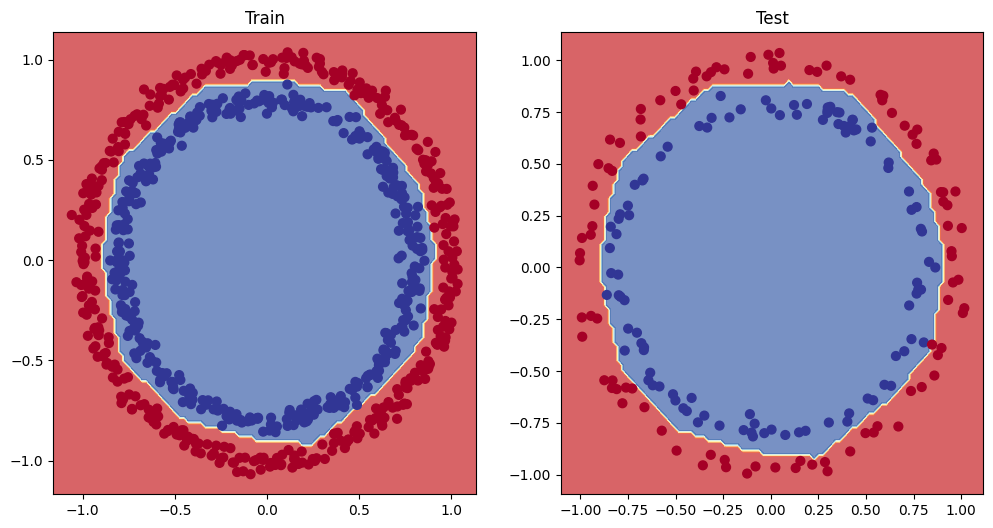

In [32]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 3. Replicating non-linear activation functions

Much of the data you'll encounter in the wild is non-linear (or a combination of linear and non-linear). Right now we've been working with dots on a 2D plot. But imagine if you had images of plants you'd like to classify, there's a lot of different plant shapes. Or text from Wikipedia you'd like to summarize, there's lots of different ways words can be put together (linear and non-linear patterns).

But what does a non-linear activation look like?

How about we replicate some and what they do?

Let's start by creating a small amount of data.

In [34]:
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

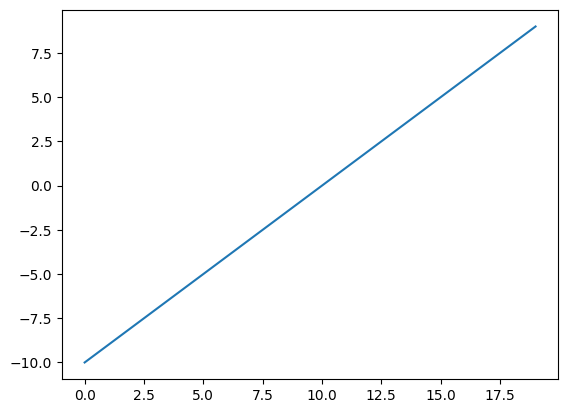

In [35]:
plt.plot(A);

A straight line, nice.

Now let's see how the ReLU activation function influences it.

And instead of using PyTorch's ReLU (torch.nn.ReLU), we'll recreate it ourselves.

The ReLU function turns all negatives to 0 and leaves the positive values as they are.

In [36]:
# Create ReLU function by hand
def relu(x):
  return torch.maximum(torch.tensor(0), x)

# Pass toy tensor through ReLU function
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])


It looks like our ReLU function worked, all of the negative values are zeros.

Let's plot them.

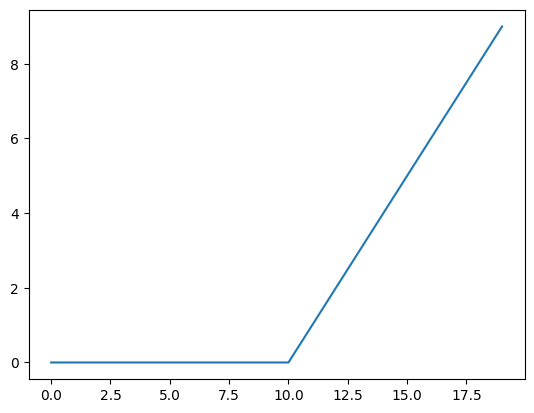

In [37]:
# Plot ReLU activated toy tensor
plt.plot(relu(A));

In [38]:
# Now let's do the same for Sigmoid = https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html#torch.nn.Sigmoid
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

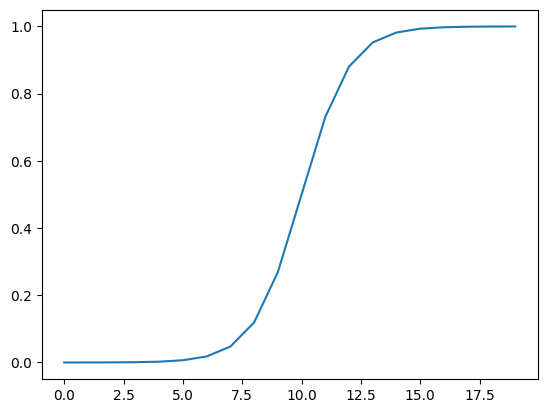

In [39]:
plt.plot(torch.sigmoid(A));

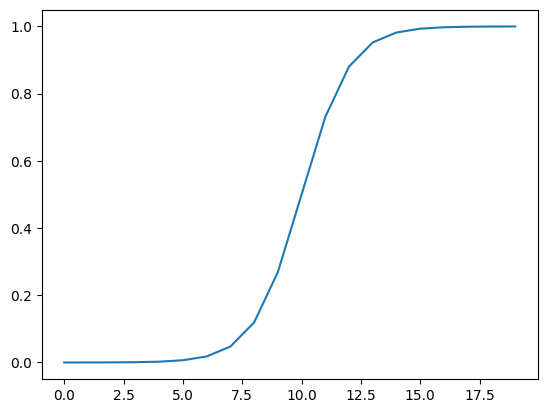

In [40]:
plt.plot(sigmoid(A));